In [13]:
using LinearAlgebra, SpecialFunctions, SpecialPolynomials, Polynomials, Plots, Distributions

# Sampling GUE Eigenvalues without forming GUE

In [14]:
########### Hermite KERNEL ################
Γ = gamma
Hj(j, x) = basis(Hermite, j)(x) # Hermite Polynomial
ϕ(j, x) = exp(-x^2/2)*Hj(j, x)/( π^(1/4)*sqrt(Γ(j+1))*2^(j/2) )

ϕ (generic function with 1 method)

In [15]:
Kernel_Hermite(j, x) = j*ϕ(j,x)^2-sqrt(j*(j+1))*ϕ(j-1,x)*ϕ(j+1,x)
Kernel_Hermite(j, x, y) = x==y ? Kernel_Hermite(j, x) : sqrt(j/2) * (ϕ(j,x)*ϕ(j-1,y) - ϕ(j-1,x) * ϕ(j,y))/(x-y) 

Kernel_Hermite (generic function with 2 methods)

# Let us now take $n = 4$ and compare (1) Monte-Carlo and (2) DPP

In [16]:
n = 4

4

## Append all GUE eigenvalues, trial = 100000

In [17]:
n_trial = 10^5
r_MC = []
for i in 1:n_trial
    A = randn(n, n)+im*randn(n, n)
    append!(r_MC, eigvals((A+A')/2))
end

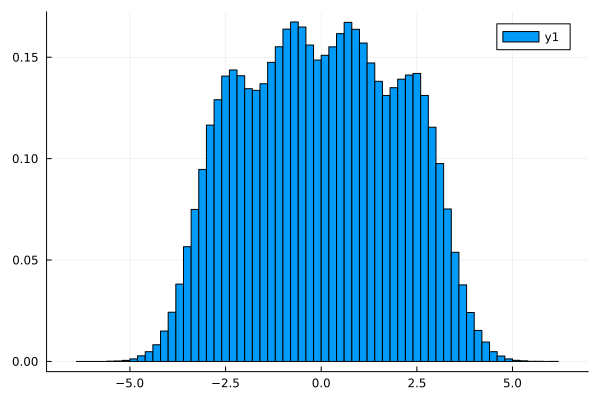

In [18]:
histogram(r_MC, normalized = true, bins=80)

# Create (discretized) Hermite kernel  

In [19]:
dx = 0.05
x = -6:dx:6

-6.0:0.05:6.0

In [20]:
K = [Kernel_Hermite(n, xi, xj) for xi in x, xj in x] * dx

241×241 Matrix{Float64}:
  3.90799e-13   5.13629e-13   6.7323e-13   …  -4.69891e-13  -3.57801e-13
  5.13629e-13   6.75069e-13   8.84836e-13     -6.17094e-13  -4.69891e-13
  6.7323e-13    8.84836e-13   1.15979e-12     -8.08195e-13  -6.15409e-13
  8.80019e-13   1.15663e-12   1.51604e-12     -1.05558e-12  -8.03783e-13
  1.14719e-12   1.50778e-12   1.97632e-12     -1.3749e-12   -1.04694e-12
  1.49138e-12   1.96017e-12   2.5693e-12   …  -1.78589e-12  -1.3599e-12
  1.93353e-12   2.54131e-12   3.33105e-12     -2.31336e-12  -1.76156e-12
  2.4999e-12    3.28572e-12   4.30681e-12     -2.98834e-12  -2.27555e-12
  3.22329e-12   4.23652e-12   5.55311e-12     -3.84961e-12  -2.93139e-12
  4.14458e-12   5.44743e-12   7.14037e-12     -4.94536e-12  -3.7658e-12
  5.3145e-12    6.98514e-12   9.15601e-12  …  -6.33539e-12  -4.8243e-12
  6.79584e-12   8.93219e-12   1.17082e-11     -8.09356e-12  -6.16314e-12
  8.66604e-12   1.13904e-11   1.49304e-11     -1.03108e-11  -7.8516e-12
  ⋮                           

In [21]:
function randprojDPP(Y)
    n = size(Y, 2)
    J = fill(0, n)
    for k in 1:n
        p = mean(abs.(Y).^2, dims=2)
        J[k] = rand(Categorical(p[:]))
        Y = ( Y * qr(Y[J[k], :]).Q )[:, 2:end]
    end
    return sort(J)
end
function randDPP(Λ, Y)
   mask = rand.(Bernoulli.(Λ))
   return randprojDPP(Y[:, mask])#, (mask)
end 

randDPP (generic function with 1 method)

# Sample DPP from the kernel 100000 times

In [22]:
S, V = eigen(K);
S[abs.(S).<1e-10] .= 0.0
S[abs.(S).>1.0] .= 1.0
r_DPP = [];
for i in 1:100000
    append!(r_DPP, randDPP(S, V))
end

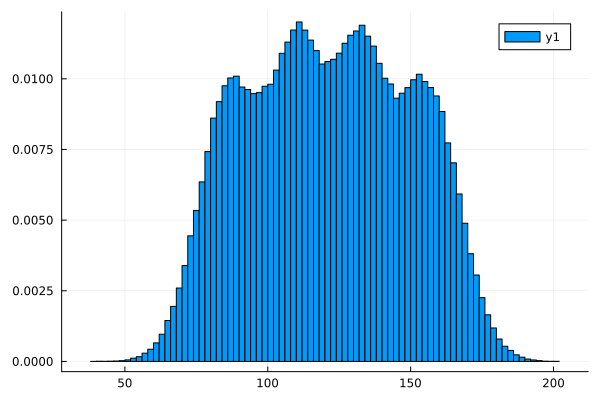

In [23]:
histogram(r_DPP, normalized=true, bins=80)